In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn import metrics
from tensorflow.keras.optimizers import Adam
from sklearn.svm import LinearSVC
from keras.models import Model
from sklearn import svm
import itertools
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from keras.models import load_model



In [12]:
# Image data preprocecing
train_path = './Train'
test_path = './Test'
imgDataGen = ImageDataGenerator(rescale=1.0/255)
train = imgDataGen.flow_from_directory(train_path,  color_mode ='grayscale', target_size = (64, 64), batch_size = 1, class_mode = 'binary')
print(train[0][0].shape)
test = imgDataGen.flow_from_directory(test_path,  color_mode ='grayscale', target_size = (64, 64), batch_size = 1, class_mode = 'binary')

Found 24959 images belonging to 2 classes.
(1, 64, 64, 1)
Found 9471 images belonging to 2 classes.


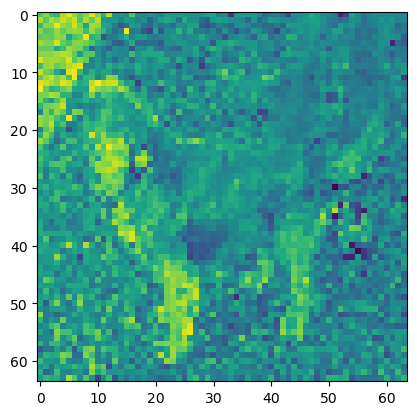

In [13]:
plt.imshow(train[0][0][0])

In [14]:

model = Sequential()

model.add(Conv2D(32,(3, 3), activation = 'relu', padding = 'same',input_shape = (64, 64, 1)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())


model.add(Conv2D(64,(3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())


model.add(Flatten(name = 'Flatten_layer'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))




In [15]:
train_y = []

for i in range(len(train)):
    train_y.append(train[i][1])
print(len(train_y))

24959


In [16]:
test_y = []
for i in range(len(test)):
    test_y.append(test[i][1])
print(len(test_y))

9471


In [17]:
lr = 0.0002
opt = Adam(learning_rate = lr)
model.compile(optimizer= opt, loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()
print(len(model.layers))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

In [18]:
model.fit(train, validation_data= test,epochs= 10, verbose= 1)

Epoch 1/10
24959/24959 [==============================] - 109s 4ms/step - loss: 0.5944 - accuracy: 0.6735 - val_loss: 0.5770 - val_accuracy: 0.7051
Epoch 2/10
24959/24959 [==============================] - 108s 4ms/step - loss: 0.4499 - accuracy: 0.7906 - val_loss: 0.4746 - val_accuracy: 0.7765
Epoch 3/10
24959/24959 [==============================] - 106s 4ms/step - loss: 0.3596 - accuracy: 0.8407 - val_loss: 0.3986 - val_accuracy: 0.8231
Epoch 4/10
24959/24959 [==============================] - 108s 4ms/step - loss: 0.2980 - accuracy: 0.8736 - val_loss: 0.3471 - val_accuracy: 0.8502
Epoch 5/10
24959/24959 [==============================] - 105s 4ms/step - loss: 0.2391 - accuracy: 0.9000 - val_loss: 0.3170 - val_accuracy: 0.8612
Epoch 6/10
24959/24959 [==============================] - 113s 5ms/step - loss: 0.1926 - accuracy: 0.9211 - val_loss: 0.2806 - val_accuracy: 0.8893
Epoch 7/10
24959/24959 [==============================] - 109s 4ms/step - loss: 0.1513 - accuracy: 0.9401 - val_

In [21]:
model.fit(train, validation_data= test,epochs= 10, verbose= 1)

Epoch 1/10
24959/24959 [==============================] - 112s 5ms/step - loss: 0.0815 - accuracy: 0.9700 - val_loss: 0.2308 - val_accuracy: 0.9139
Epoch 2/10
24959/24959 [==============================] - 109s 4ms/step - loss: 0.0707 - accuracy: 0.9740 - val_loss: 0.2648 - val_accuracy: 0.8943
Epoch 3/10
24959/24959 [==============================] - 111s 4ms/step - loss: 0.0645 - accuracy: 0.9768 - val_loss: 0.2458 - val_accuracy: 0.9177
Epoch 4/10
24959/24959 [==============================] - 109s 4ms/step - loss: 0.0616 - accuracy: 0.9777 - val_loss: 0.2232 - val_accuracy: 0.9244
Epoch 5/10
24959/24959 [==============================] - 115s 5ms/step - loss: 0.0587 - accuracy: 0.9787 - val_loss: 0.2937 - val_accuracy: 0.8924
Epoch 6/10
24959/24959 [==============================] - 112s 4ms/step - loss: 0.0534 - accuracy: 0.9815 - val_loss: 0.2521 - val_accuracy: 0.9187
Epoch 7/10
24959/24959 [==============================] - 112s 4ms/step - loss: 0.0488 - accuracy: 0.9835 - val_

In [22]:
model.fit(train, validation_data= test,epochs= 10, verbose= 1)


Epoch 1/10
24959/24959 [==============================] - 115s 5ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 0.4153 - val_accuracy: 0.8964
Epoch 2/10
24959/24959 [==============================] - 115s 5ms/step - loss: 0.0375 - accuracy: 0.9873 - val_loss: 0.2970 - val_accuracy: 0.8869
Epoch 3/10
24959/24959 [==============================] - 114s 5ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.4202 - val_accuracy: 0.8940
Epoch 4/10
24959/24959 [==============================] - 117s 5ms/step - loss: 0.0356 - accuracy: 0.9877 - val_loss: 0.2761 - val_accuracy: 0.9030
Epoch 5/10
24959/24959 [==============================] - 115s 5ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.2342 - val_accuracy: 0.9303
Epoch 6/10
24959/24959 [==============================] - 115s 5ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.3411 - val_accuracy: 0.9068
Epoch 7/10
24959/24959 [==============================] - 115s 5ms/step - loss: 0.0338 - accuracy: 0.9894 - val_

In [23]:
model.fit(train, validation_data= test,epochs= 10, verbose= 1)

Epoch 1/10
24959/24959 [==============================] - 118s 5ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.3199 - val_accuracy: 0.9167
Epoch 2/10
24959/24959 [==============================] - 117s 5ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.3611 - val_accuracy: 0.9035
Epoch 3/10
24959/24959 [==============================] - 121s 5ms/step - loss: 0.0282 - accuracy: 0.9921 - val_loss: 0.2789 - val_accuracy: 0.9203
Epoch 4/10
24959/24959 [==============================] - 121s 5ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.3210 - val_accuracy: 0.9136
Epoch 5/10
24959/24959 [==============================] - 118s 5ms/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.2473 - val_accuracy: 0.9244
Epoch 6/10
24959/24959 [==============================] - 119s 5ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.2474 - val_accuracy: 0.9376
Epoch 7/10
24959/24959 [==============================] - 120s 5ms/step - loss: 0.0223 - accuracy: 0.9931 - val_

In [24]:
model3= Model(inputs=model.input, outputs=model.layers[-6].output)
model3.summary()
print(len(model3.layers))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5_input (InputLayer)  [(None, 64, 64, 1)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0   

In [25]:
model.save('DogVsCat')

INFO:tensorflow:Assets written to: DogVsCat\assets


INFO:tensorflow:Assets written to: DogVsCat\assets


In [26]:
from tensorflow import keras
myModel = keras.models.load_model('DogVsCat')
